# Imports

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Question 1

1. Create two CSV files with three columns: Tom, Brick, Harry with index 'True' and 'False'. Each column must contain at least ten values each as a combination of data types.  

In [ ]:
# Create DataFrame 1 with three columns: Tom, Brick, Harry
df1 = pd.DataFrame({
    'Tom': [1, 'apple', 5.6, True, 9, 'banana', 3.2, False, 'grape', 12],
    'Brick': ['red', 5, False, 7.8, 'blue', 10, True, 4, 'yellow', 6],
    'Harry': [True, 3.5, 'orange', 8, 1, 'pear', False, 6.9, 11, 'cherry']
}, index=[True, False, True, False, True, False, True, False, True, False])

# Create DataFrame 2 with different data
df2 = pd.DataFrame({
    'Tom': [10, 'carrot', 3.1, False, 7, 'mango', 4.8, True, 'plum', 14],
    'Brick': ['green', 9, True, 6.2, 'purple', 11, False, 2, 'orange', 8],
    'Harry': [False, 4.3, 'banana', 12, 5, 'melon', True, 8.7, 13, 'strawberry']
}, index=[False, True, False, True, False, True, False, True, False, True])

# Save to CSV files
df1.to_csv('file1.csv', index=True)
df2.to_csv('file2.csv', index=True)



2. Create a dataframe with at least 5 columns and 10 rows. There must be some missing values in it. If the integer column contains missing values, replace them using a statistical approach. Also, if there are any missing values in the String column, drop the rows using some looping function.  

In [ ]:
random.seed(10)
dtype = ['int', 'str']

def get_col_data(type, rows):
    """Generate column data based on type"""
    if type == dtype[0]:
        return list(np.random.randint(1, 100, rows))
    else:
        return [f'data-{i}' for i in np.random.randint(1, 100, rows)]

def insert_random_nulls(data_dict, null_probability=0.2):
    """
    Insert null values at random positions in the dictionary's list values
    """
    result = {}

    for key, value_list in data_dict.items():
        # Create a copy of the list to avoid modifying the original
        modified_list = value_list.copy()

        # Determine number of nulls to insert
        list_length = len(value_list)
        num_nulls = int(list_length * null_probability)

        # Randomly select positions to insert nulls
        null_positions = random.sample(range(list_length), num_nulls)

        # Insert nulls at selected positions
        for pos in null_positions:
            modified_list[pos] = None

        result[key] = modified_list
    return result


def ganerate_data(rows=10, cols=5):
    """Generate initial data"""
    data = {}

    for i in range(1, cols+1):
        col_d_type = random.choice(dtype)
        col_name = f'col{i}'
        col_values = get_col_data(col_d_type, rows)
        data[col_name] = col_values

    return data

In [ ]:
data_with_nulls = insert_random_nulls(ganerate_data())
df = pd.DataFrame(data_with_nulls)

# Step 1: Replace missing values in integer columns using mean
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

print("\nAfter filling numeric nulls with mean:")
print(df)

# Step 2: Drop rows with missing values in string columns using loop
string_columns = df.select_dtypes(include='object').columns
rows_to_drop = set()  # Using set to avoid duplicate indices

for column in string_columns:
    for i, value in enumerate(df[column]):
        if pd.isna(value):
            rows_to_drop.add(i)

# Drop the collected rows
if rows_to_drop:
    df.drop(index=rows_to_drop, inplace=True)

df.reset_index(drop=True, inplace=True)
print(df)



After filling numeric nulls with mean:
      col1    col2     col3  col4     col5
0  data-41  19.000  data-59  18.0  data-13
1   data-9  63.000  data-98  95.0  data-91
2  data-57   9.000     None  58.0     None
3  data-85  98.000  data-39  76.0  data-53
4  data-38  50.125  data-94  64.0  data-33
5   data-7  60.000  data-47  64.0  data-52
6     None  82.000  data-65  90.0  data-10
7  data-34  30.000     None  12.0     None
8  data-17  40.000  data-36  94.0  data-28
9     None  50.125  data-63  69.0  data-44
      col1    col2     col3  col4     col5
0  data-41  19.000  data-59  18.0  data-13
1   data-9  63.000  data-98  95.0  data-91
2  data-85  98.000  data-39  76.0  data-53
3  data-38  50.125  data-94  64.0  data-33
4   data-7  60.000  data-47  64.0  data-52
5  data-17  40.000  data-36  94.0  data-28



3. Create a dataframe with at least 5 columns and 10 rows. Each column must contain only integer elements. Column names must be Abilash, Ankit, Ashok, Asif, Anjaan. Now apply a function where we want to group together the data based on any row or column. Group the series using a mapper or by a series of columns.  

In [ ]:
np.random.seed(42)


names = ['Abilash', 'Ankit', 'Ashok', 'Asif', 'Anjaan']
df = pd.DataFrame({name:np.random.randint(1,10,10) for name in names})
print("Original DataFrame:\n" ,df)

# Example: Grouping the data by a series of columns (Abilash and Ankit)
grouped = df.groupby(['Abilash', 'Ankit']).sum()
print("\n\nGrouped by columns 'Abilash' and 'Ankit':\n", grouped)

# Alternatively, you can group by rows using a mapper (e.g., create a mapper for columns)
mapper = {
    'Abilash': 'Group1',
    'Ankit': 'Group1',
    'Ashok': 'Group2',
    'Asif': 'Group2',
    'Anjaan': 'Group3'
}

# Group the columns using the mapper
grouped_by_mapper = df.T.groupby(mapper).sum()

print("\n\nGrouped by mapper:\n", grouped_by_mapper)

Original DataFrame:
    Abilash  Ankit  Ashok  Asif  Anjaan
0        7      8      1     3       5
1        4      8      6     7       2
2        8      3      9     5       4
3        5      6      1     9       7
4        7      5      3     7       8
5        3      2      7     2       3
6        7      8      4     4       1
7        8      6      9     9       4
8        5      2      3     2       2
9        4      5      5     9       8


Grouped by columns 'Abilash' and 'Ankit':
                Ashok  Asif  Anjaan
Abilash Ankit                     
3       2          7     2       3
4       5          5     9       8
        8          6     7       2
5       2          3     2       2
        6          1     9       7
7       5          3     7       8
        8          5     7       6
8       3          9     5       4
        6          9     9       4


Grouped by mapper:
          0   1   2   3   4  5   6   7  8   9
Group1  15  12  11  11  12  5  15  14  7   9
Group2  


4. Read the CountryDataIND.csv file and perform statistical operations on the dataset. Look for any missing data if any.  

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/CountryDataIND.csv')

In [ ]:
df.head()

Series Code Frequency          Series Units of measurement  \
0  IT_USE_ii99    Annual  Internet users   Per 100 population   
1  IT_USE_ii99    Annual  Internet users   Per 100 population   
2  IT_USE_ii99    Annual  Internet users   Per 100 population   
3  SE_ADT_1524    Annual   Literacy rate              Percent   
4  SE_ADT_1524    Annual   Literacy rate              Percent   

                 Location        Age group         Sex Reference Area  \
0  Total (national level)   All age ranges  Both sexes          India   
1  Total (national level)   All age ranges  Both sexes          India   
2  Total (national level)   All age ranges  Both sexes          India   
3  Total (national level)  15-24 year olds  Both sexes          India   
4  Total (national level)  15-24 year olds  Both sexes          India   

     Source type  Time period  Observation Value Unit multiplier  \
0  Not available         1999                0.2           Units   
1  Not available         2002                3.2           Units   
2  Not available         2006                7.0           Units   
3  Not available         1991               48.5           Units   
4  Not available         2001               76.4           Units   

  Nature of data points  Time period details  \
0          Country Data                 1999   
1          Country Data                 2002   
2          Country Data                 2006   
3          Country Data                 1991   
4          Country Data                 2001   

                       Source details  Footnotes  
0  Ministry of Information Technology        NaN  
1  Ministry of Information Technology        NaN  
2  Ministry of Information Technology        NaN  
3                 Planning Commission        NaN  
4                 Planning Commission        NaN

In [ ]:
print('\n\ndf.describe\n',df.describe())
print('\n\ndf.info\n',df.info())
print('\n\ndf.shape\n',df.shape)



df.describe
        Time period  Observation Value  Time period details  Footnotes
count    29.000000          29.000000            29.000000        0.0
mean   1999.551724         140.806897          1999.551724        NaN
std       4.807629         156.922569             4.807629        NaN
min    1990.000000           0.200000          1990.000000        NaN
25%    1998.000000          27.500000          1998.000000        NaN
50%    2000.000000          48.500000          2000.000000        NaN
75%    2004.000000         301.000000          2004.000000        NaN
max    2006.000000         503.000000          2006.000000        NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Series Code            29 non-null     object 
 1   Frequency              29 non-null     object 
 2   Series                 29 non-null     

In [ ]:
df.isnull().sum()

Series Code               0
Frequency                 0
Series                    0
Units of measurement      0
Location                  0
Age group                 0
Sex                       0
Reference Area            0
Source type               0
Time period               0
Observation Value         0
Unit multiplier           0
Nature of data points     0
Time period details       0
Source details            6
Footnotes                29
dtype: int64

In [ ]:
df = df.drop('Footnotes', axis=1)

In [ ]:
df = df.dropna(how='any', axis=0)

In [ ]:
total_missing = df.isnull().sum().sum()
print("\nTotal Missing Values in the Dataset:", total_missing)



Total Missing Values in the Dataset: 0



5. Plot a histogram with bin size 10 for the column 'Observation Value'. Also, plot a scatter plot between 'Observation Value' and 'Time Period'.

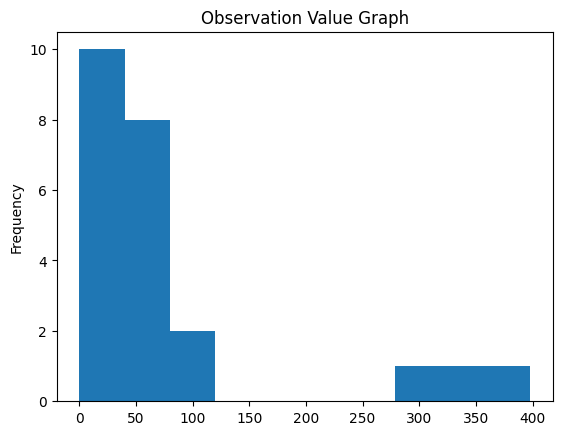

In [ ]:
plt.figure()
df['Observation Value'].plot.hist(bins=10)
plt.title('Observation Value Graph')
plt.show()

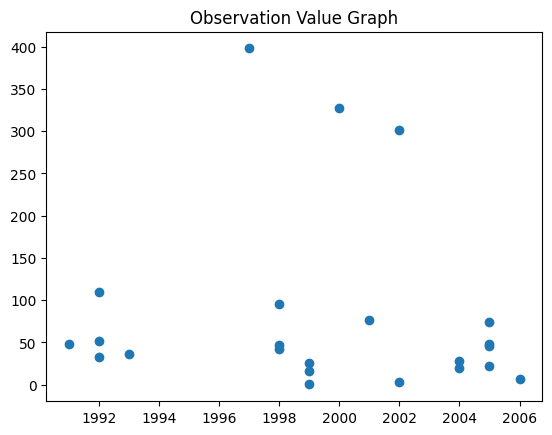

In [ ]:
plt.figure()
plt.scatter(df['Time period details'],df['Observation Value'])
plt.title('Observation Value Graph')
plt.show()

# Question 2

Suppose you have landed a job, and the first task you’re assigned is to prepare a report that includes the following:


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/purchase_data.csv')
df.head()

Purchase ID             SN  Age Gender  Item ID  \
0            0        Lisim78   20   Male      108   
1            1    Lisovynya38   40   Male      143   
2            2     Ithergue48   24   Male       92   
3            3  Chamassasya86   24   Male      100   
4            4      Iskosia90   23   Male      131   

                                   Item Name  Price  
0  Extraction, Quickblade Of Trembling Hands   3.53  
1                          Frenzied Scimitar   1.56  
2                               Final Critic   4.88  
3                                Blindscythe   3.27  
4                                       Fury   1.44

1. Player Count  
   - Total Number of Players  



In [ ]:
df.shape

(780, 7)

In [ ]:
print("Total number of playes: ",df['SN'].value_counts().count())

Total number of playes:  576


2. Purchasing Analysis (Total)  
   - Number of Unique Items  
   - Average Purchase Price  
   - Total Number of Purchases  
   - Total Revenue  



In [ ]:
# Number of Unique Items
print("Number of Unique items: ",df['Item ID'].value_counts().count())

# Average Purchase Price
print("Average Purachasing Price: ",df['Price'].mean())

# Total Number of Purchases
print("Total Number of Purchases: ",len(df['Purchase ID']))

# Total Revenue
print("Total Revenue: ",df['Price'].sum())

Number of Unique items:  183
Average Purachasing Price:  3.0509871794871795
Total Number of Purchases:  780
Total Revenue:  2379.77


3. Gender Demographics  
   - Percentage and Count of Male Players  
   - Percentage and Count of Female Players  
   - Percentage and Count of Other / Non-Disclosed  



In [ ]:
gender_counts = df.groupby('Gender')['SN'].nunique()
total_players = gender_counts.sum()
gender_counts

Gender
Female                    81
Male                     484
Other / Non-Disclosed     11
Name: SN, dtype: int64

In [ ]:
for g in gender_counts.index:
    g_count = gender_counts[g]
    g_percentage = (g_count / total_players) * 100
    print(f"{g} Players Count: {g_count}")
    print(f"{g} Players Percentage: {g_percentage:.2f}%")
    print()

Female Players Count: 81
Female Players Percentage: 14.06%

Male Players Count: 484
Male Players Percentage: 84.03%

Other / Non-Disclosed Players Count: 11
Other / Non-Disclosed Players Percentage: 1.91%



4. Purchasing Analysis (Gender)  
   - The following, each broken by gender:  
     - Purchase Count  
     - Average Purchase Price  
     - Total Purchase Value  
     - Average Purchase Total per Person by Gender  



In [ ]:
df_gender = df.groupby('Gender')

In [ ]:
for g in df_gender.groups.keys():
    print(f'\n\nGender: {g}')
    print(f"Purchase Count: {len(df_gender.get_group(g))}")
    print(f"Average Purchase Price: {df_gender.get_group(g)['Price'].mean():.2f}")
    print(f"Total Purchase Value: {df_gender.get_group(g)['Price'].sum():.2f}")
    print(f"Average Purchase Total per Person by Gender: {df_gender.get_group(g)['Price'].sum()/gender_counts[g]:.2f}")



 Gender: Female
Purchase Count: 113
Average Purchase Price: 3.20
Total Purchase Value: 361.94
Average Purchase Total per Person by Gender: 4.47


 Gender: Male
Purchase Count: 652
Average Purchase Price: 3.02
Total Purchase Value: 1967.64
Average Purchase Total per Person by Gender: 4.07


 Gender: Other / Non-Disclosed
Purchase Count: 15
Average Purchase Price: 3.35
Total Purchase Value: 50.19
Average Purchase Total per Person by Gender: 4.56


5. Age Demographics  
   - The following, each broken into bins of 4 years (i.e. <10, 10-14, 15-19, etc.):  
     - Purchase Count  
     - Average Purchase Price  
     - Total Purchase Value  
     - Average Purchase Total per Person by Age Group  



In [ ]:
df_t = df.copy()

def categorize_observation(value):
    if value < 10:
        return '<10'
    elif 10 <= value < 14:
        return '10-14'
    elif 15 <= value < 19:
        return '15-19'
    else:
        return '>19'

df_t['Category'] = df_t['Age'].apply(categorize_observation)
cat_grouped = df_t.groupby(['Category'])
category_counts = cat_grouped['SN'].nunique()

In [ ]:
for c in cat_grouped.groups.keys():
    print(f'\nCategory: {c}')
    print(f"Purchase Count: {len(cat_grouped.get_group(c))}")
    print(f"Average Purchase Price: {cat_grouped.get_group(c)['Price'].mean():.2f}")
    print(f"Total Purchase Value: {cat_grouped.get_group(c)['Price'].sum():.2f}")
    print(f"Average Purchase Total per Person by Age Group: {cat_grouped.get_group(c)['Price'].sum()/category_counts[c]:.2f}")


Category: 10-14
Purchase Count: 26
Average Purchase Price: 2.92
Total Purchase Value: 75.87
Average Purchase Total per Person by Age Group: 3.79

Category: 15-19
Purchase Count: 113
Average Purchase Price: 3.03
Total Purchase Value: 342.91
Average Purchase Total per Person by Age Group: 3.81

Category: <10
Purchase Count: 23
Average Purchase Price: 3.35
Total Purchase Value: 77.13
Average Purchase Total per Person by Age Group: 4.54

Category: >19
Purchase Count: 618
Average Purchase Price: 3.05
Total Purchase Value: 1883.86
Average Purchase Total per Person by Age Group: 4.20


<ipython-input-148-808c5381e769>:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  print(f"Purchase Count: {len(cat_grouped.get_group(c))}")
<ipython-input-148-808c5381e769>:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  print(f"Average Purchase Price: {cat_grouped.get_group(c)['Price'].mean():.2f}")
<ipython-input-148-808c5381e769>:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  print(f"Total Purchase Value: {cat_grouped.get_group(c)['Price'].sum():.2f}")
<ipython-input-148-808c5381e769>:6: FutureWarning: When grouping with a length

6. Top Spenders  
   - Identify the top 5 spenders in the game by total purchase value, then list (in a table):  
     - SN  
     - Purchase Count  
     - Average Purchase Price  
     - Total Purchase Value  


In [ ]:
top_spenders = df.groupby('SN')['Price'].agg(['sum', 'count', 'mean'])
top_spenders.rename(columns={'sum': 'Total Purchase Value', 'count': 'Purchase Count', 'mean': 'Average Purchase Price'}, inplace=True)

top_5_spenders = top_spenders.sort_values(by=['Total Purchase Value'], ascending=False).head(5)
top_5_spenders

Total Purchase Value  Purchase Count  Average Purchase Price
SN                                                                       
Lisosia93                   18.96               5                3.792000
Idastidru52                 15.45               4                3.862500
Chamjask73                  13.83               3                4.610000
Iral74                      13.62               4                3.405000
Iskadarya95                 13.10               3                4.366667


7. Most Popular Items  
   - Identify the 5 most popular items by purchase count, then list (in a table):  
     - Item ID  
     - Item Name  
     - Purchase Count  
     - Item Price  
     - Total Purchase Value  


In [ ]:
popular_items = df.groupby(['Item ID', 'Item Name'])['Price'].agg(['count', 'mean', 'sum'])
popular_items.rename(columns={'count': 'Purchase Count', 'mean': 'Item Price', 'sum': 'Total Purchase Value'}, inplace=True)

top_5_popular_items = popular_items.sort_values(by=['Purchase Count'], ascending=False).head(5)
top_5_popular_items

Purchase Count  \
Item ID Item Name                                                      
178     Oathbreaker, Last Hope of the Breaking Storm              12   
145     Fiery Glass Crusader                                       9   
108     Extraction, Quickblade Of Trembling Hands                  9   
82      Nirvana                                                    9   
19      Pursuit, Cudgel of Necromancy                              8   

                                                      Item Price  \
Item ID Item Name                                                  
178     Oathbreaker, Last Hope of the Breaking Storm        4.23   
145     Fiery Glass Crusader                                4.58   
108     Extraction, Quickblade Of Trembling Hands           3.53   
82      Nirvana                                             4.90   
19      Pursuit, Cudgel of Necromancy                       1.02   

                                                      Total Purchase Value  
Item ID Item Name                                                           
178     Oathbreaker, Last Hope of the Breaking Storm                 50.76  
145     Fiery Glass Crusader                                         41.22  
108     Extraction, Quickblade Of Trembling Hands                    31.77  
82      Nirvana                                                      44.10  
19      Pursuit, Cudgel of Necromancy                                 8.16


8. Most Profitable Items  
   - The 5 most profitable items by total purchase value, then list (in a table):  
     - Item ID  
     - Item Name  
     - Purchase Count  
     - Item Price  
     - Total Purchase Value  

In [ ]:
profitable_items = df.groupby(['Item ID', 'Item Name'])['Price'].agg(['count', 'mean', 'sum'])
profitable_items.rename(columns={'count': 'Purchase Count', 'mean': 'Item Price', 'sum': 'Total Purchase Value'}, inplace=True)

top_5_profitable_items = profitable_items.sort_values(by=['Total Purchase Value'], ascending=False).head(5)
top_5_profitable_items

Purchase Count  \
Item ID Item Name                                                      
178     Oathbreaker, Last Hope of the Breaking Storm              12   
82      Nirvana                                                    9   
145     Fiery Glass Crusader                                       9   
92      Final Critic                                               8   
103     Singed Scalpel                                             8   

                                                      Item Price  \
Item ID Item Name                                                  
178     Oathbreaker, Last Hope of the Breaking Storm        4.23   
82      Nirvana                                             4.90   
145     Fiery Glass Crusader                                4.58   
92      Final Critic                                        4.88   
103     Singed Scalpel                                      4.35   

                                                      Total Purchase Value  
Item ID Item Name                                                           
178     Oathbreaker, Last Hope of the Breaking Storm                 50.76  
82      Nirvana                                                      44.10  
145     Fiery Glass Crusader                                         41.22  
92      Final Critic                                                 39.04  
103     Singed Scalpel                                               34.80

# Question 3

Fuel economy data are the result of vehicle testing done at the Environmental Protection Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers with oversight by EPA.

Dataset Description:  
- **Model**: Vehicle make and model  
- **Displ**: Engine displacement - the size of an engine in liters  
- **Cyl**: The number of cylinders in a particular engine  
- **Trans**: Transmission type and number of gears  
- **Drive**: Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive)  
- **Fuel**: Fuel type  
- **Cert Region***: Certification region code  
- **Sales Area***: Certification region code  
- **Stnd**: Vehicle emissions standard  
- **Stnd Description***: Vehicle emissions standard description  
- **Underhood ID**: This is a 12-digit ID number that can be found on the underhood emission label of every vehicle. It's required by the EPA to designate its "test group" or "engine family."  
- **Veh Class**: EPA vehicle class  
- **Air Pollution Score**: Air pollution score (smog rating)  
- **City MPG**: Estimated city mpg (miles/gallon)  
- **Hwy MPG**: Estimated highway mpg (miles/gallon)  
- **Cmb MPG**: Estimated combined mpg (miles/gallon)  
- **Greenhouse Gas Score**: Greenhouse gas rating  
- **SmartWay**: Yes, No, or Elite  
- **Comb CO2***: Combined city/highway CO2 tailpipe emissions in grams per mile  

*Note: For more detailed information about the dataset, refer to the text file.*

Perform the pre-requisites:



**Assessing the Data**  (all_alpha_xx)

i. Data cleaning  
ii. Inspection  
iii. Manipulation if required  
iv. Extracting meaningful visualization based on your understanding  
v. Data consolidation if required



In [ ]:
all_alpha_08 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/all_alpha_08.csv')
all_alpha_18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/all_alpha_18.csv')

In [ ]:
all_alpha_08.head()

Model  Displ      Cyl    Trans Drive      Fuel Sales Area Stnd  \
0  ACURA MDX    3.7  (6 cyl)  Auto-S5   4WD  Gasoline         CA   U2   
1  ACURA MDX    3.7  (6 cyl)  Auto-S5   4WD  Gasoline         FA   B5   
2  ACURA RDX    2.3  (4 cyl)  Auto-S5   4WD  Gasoline         CA   U2   
3  ACURA RDX    2.3  (4 cyl)  Auto-S5   4WD  Gasoline         FA   B5   
4   ACURA RL    3.5  (6 cyl)  Auto-S5   4WD  Gasoline         CA   U2   

   Underhood ID    Veh Class Air Pollution Score FE Calc Appr City MPG  \
0  8HNXT03.7PKR          SUV                   7          Drv       15   
1  8HNXT03.7PKR          SUV                   6          Drv       15   
2  8HNXT02.3DKR          SUV                   7          Drv       17   
3  8HNXT02.3DKR          SUV                   6          Drv       17   
4  8HNXV03.5HKR  midsize car                   7          Drv       16   

  Hwy MPG Cmb MPG  Unadj Cmb MPG Greenhouse Gas Score SmartWay  
0      20      17        22.0527                    4       no  
1      20      17        22.0527                    4       no  
2      22      19        24.1745                    5       no  
3      22      19        24.1745                    5       no  
4      24      19        24.5629                    5       no

In [ ]:
all_alpha_18.head()

Model  Displ  Cyl       Trans Drive      Fuel Cert Region       Stnd  \
0  ACURA RDX    3.5  6.0  SemiAuto-6   2WD  Gasoline          FA     T3B125   
1  ACURA RDX    3.5  6.0  SemiAuto-6   2WD  Gasoline          CA         U2   
2  ACURA RDX    3.5  6.0  SemiAuto-6   4WD  Gasoline          FA     T3B125   
3  ACURA RDX    3.5  6.0  SemiAuto-6   4WD  Gasoline          CA         U2   
4  ACURA TLX    2.4  4.0       AMS-8   2WD  Gasoline          CA  L3ULEV125   

             Stnd Description  Underhood ID  Veh Class  Air Pollution Score  \
0      Federal Tier 3 Bin 125  JHNXT03.5GV3  small SUV                    3   
1      California LEV-II ULEV  JHNXT03.5GV3  small SUV                    3   
2      Federal Tier 3 Bin 125  JHNXT03.5GV3  small SUV                    3   
3      California LEV-II ULEV  JHNXT03.5GV3  small SUV                    3   
4  California LEV-III ULEV125  JHNXV02.4WH3  small car                    3   

  City MPG Hwy MPG Cmb MPG  Greenhouse Gas Score SmartWay Comb CO2  
0       20      28      23                     5       No      386  
1       20      28      23                     5       No      386  
2       19      27      22                     4       No      402  
3       19      27      22                     4       No      402  
4       23      33      27                     6       No      330

In [ ]:
all_alpha_18.describe()

Displ          Cyl  Air Pollution Score  Greenhouse Gas Score
count  1609.000000  1609.000000          1611.000000           1611.000000
mean      3.055687     5.479180             3.958411              4.711359
std       1.344574     1.749121             1.824303              1.657429
min       1.200000     3.000000             1.000000              1.000000
25%       2.000000     4.000000             3.000000              4.000000
50%       3.000000     6.000000             3.000000              5.000000
75%       3.600000     6.000000             5.000000              6.000000
max       8.000000    16.000000            10.000000             10.000000

In [ ]:
all_alpha_08.describe()

Displ  Unadj Cmb MPG
count  2404.000000    2205.000000
mean      3.748918      23.916104
std       1.335785       6.366170
min       1.300000      10.018400
25%       2.500000      19.113900
50%       3.500000      23.921300
75%       4.800000      27.869300
max       8.400000      65.777800

In [ ]:
all_alpha_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [ ]:
all_alpha_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [ ]:
def clean_and_analyze_vehicle_data(df):
    # I. Data Cleaning
    # Create a copy to avoid modifying original data
    clean_df = df.copy()

    # Convert MPG columns to numeric
    # If conversion fails, replace invalid entries with NaN using errors='coerce'
    mpg_columns = ['City MPG', 'Hwy MPG', 'Cmb MPG']
    for col in mpg_columns:
        clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

    # Convert Greenhouse Gas Score to numeric
    clean_df['Greenhouse Gas Score'] = pd.to_numeric(clean_df['Greenhouse Gas Score'], errors='coerce')

    # Convert Air Pollution Score to numeric
    clean_df['Air Pollution Score'] = pd.to_numeric(clean_df['Air Pollution Score'], errors='coerce')

    # Clean Cylinder data
    # Convert 'Cyl' column to string type before applying str.extract()
    clean_df['Cyl'] = clean_df['Cyl'].astype(str).str.extract('(\d+)').astype(float)

    # II. Data Inspection
    print("\nMissing Values Analysis:")
    print(clean_df.isnull().sum())

    print("\nBasic Statistics:")
    numeric_cols = clean_df.select_dtypes(include=[np.number]).columns
    print(clean_df[numeric_cols].describe())

    # III. Data Manipulation
    # Create efficiency categories
    clean_df['Efficiency_Category'] = pd.cut(clean_df['Cmb MPG'],
                                           bins=[0, 15, 20, 25, 30, float('inf')],
                                           labels=['Very Poor', 'Poor', 'Moderate', 'Good', 'Excellent'])

    # Extract manufacturer from model
    clean_df['Manufacturer'] = clean_df['Model'].str.split().str[0]

    # IV. Visualizations

    # 1. Displacement vs Combined MPG
    plt.figure(figsize=(10, 6))
    plt.scatter(clean_df['Displ'], clean_df['Cmb MPG'], alpha=0.5)
    plt.xlabel('Engine Displacement')
    plt.ylabel('Combined MPG')
    plt.title('Engine Displacement vs Fuel Efficiency')
    plt.show()

    # 2. Distribution of Combined MPG
    plt.figure(figsize=(10, 6))
    sns.histplot(data=clean_df, x='Cmb MPG', bins=30)
    plt.title('Distribution of Combined MPG')
    plt.show()

    # 3. Average MPG by Vehicle Class
    plt.figure(figsize=(12, 6))
    avg_mpg_by_class = clean_df.groupby('Veh Class')['Cmb MPG'].mean().sort_values()
    avg_mpg_by_class.plot(kind='bar')
    plt.title('Average Combined MPG by Vehicle Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 4. Environmental Scores Correlation
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=clean_df,
                   x='Greenhouse Gas Score',
                   y='Air Pollution Score',
                   size='Cmb MPG',
                   sizes=(20, 200),
                   alpha=0.5)
    plt.title('Environmental Scores Correlation')
    plt.show()

    # V. Data Consolidation
    summary_stats = {
        'Total Vehicles': len(clean_df),
        'Average MPG': clean_df['Cmb MPG'].mean(),
        'Most Common Vehicle Class': clean_df['Veh Class'].mode()[0],
        'Average Greenhouse Gas Score': clean_df['Greenhouse Gas Score'].mean(),
        'Average Air Pollution Score': clean_df['Air Pollution Score'].mean(),
        'Fuel Types': clean_df['Fuel'].unique().tolist(),
        'MPG by Efficiency Category': clean_df.groupby('Efficiency_Category')['Cmb MPG'].agg(['count', 'mean'])
    }

    return clean_df, summary_stats


Missing Values Analysis:
Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score      72
FE Calc Appr            199
City MPG                265
Hwy MPG                 265
Cmb MPG                 265
Unadj Cmb MPG           199
Greenhouse Gas Score    265
SmartWay                  0
dtype: int64

Basic Statistics:
             Displ          Cyl  Air Pollution Score     City MPG  \
count  2404.000000  2205.000000          2332.000000  2139.000000   
mean      3.748918     6.105669             6.029588    17.209444   
std       1.335785     1.845726             1.461791     4.001296   
min       1.300000     2.000000             0.000000     8.000000   
25%       2.500000     4.000000             6.000000    14.000000   
50%       3.500000     6

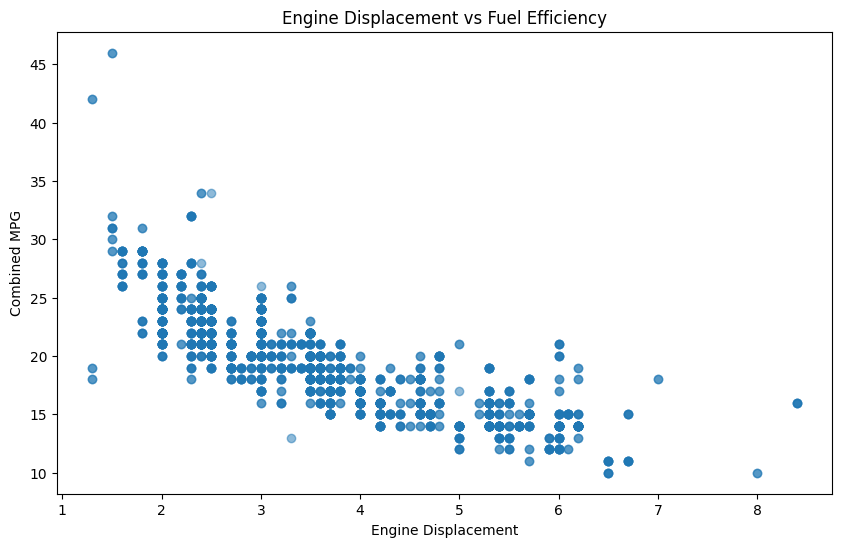

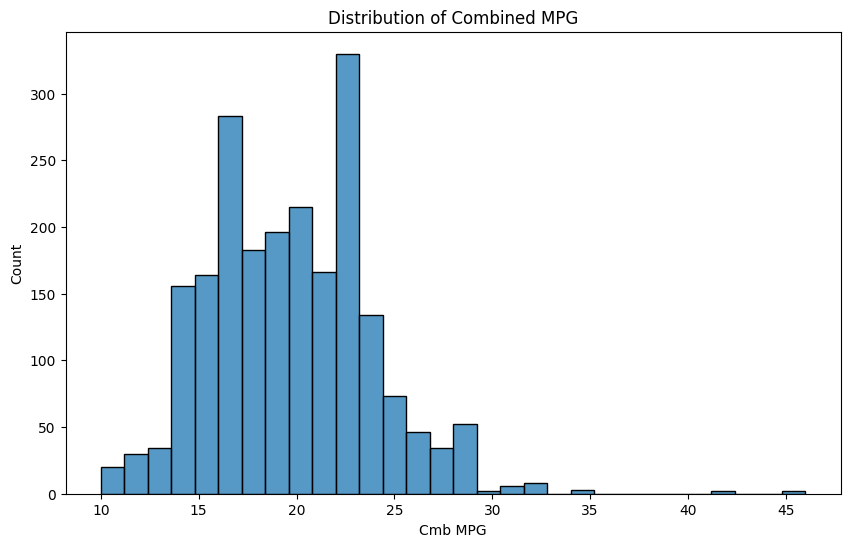


Key Findings:

Total Vehicles:
2404

Average MPG:
19.600280504908834

Most Common Vehicle Class:
small car

Average Greenhouse Gas Score:
5.124824684431977

Average Air Pollution Score:
6.02958833619211

Fuel Types:
['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG']

MPG by Efficiency Category:
                     count       mean
Efficiency_Category                  
Very Poor              404  14.009901
Poor                   877  18.226910
Moderate               703  22.625889
Good                   134  27.268657
Excellent               21  34.285714


<ipython-input-131-c77fbf539d68>:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'MPG by Efficiency Category': clean_df.groupby('Efficiency_Category')['Cmb MPG'].agg(['count', 'mean'])


In [ ]:
# Execute the analysis
cleaned_data_08, summary_08 = clean_and_analyze_vehicle_data(all_alpha_08)

# Print summary findings
print("\nKey Findings:")
for key, value in summary_08.items():
    print(f"\n{key}:")
    print(value)


Missing Values Analysis:
Model                    0
Displ                    2
Cyl                      2
Trans                    0
Drive                    0
Fuel                     0
Cert Region              0
Stnd                     0
Stnd Description         0
Underhood ID             0
Veh Class                0
Air Pollution Score      0
City MPG                79
Hwy MPG                 79
Cmb MPG                 79
Greenhouse Gas Score     0
SmartWay                 0
Comb CO2                 0
dtype: int64

Basic Statistics:
             Displ          Cyl  Air Pollution Score     City MPG  \
count  1609.000000  1609.000000          1611.000000  1532.000000   
mean      3.055687     5.479180             3.958411    20.902742   
std       1.344574     1.749121             1.824303     6.272836   
min       1.200000     3.000000             1.000000     9.000000   
25%       2.000000     4.000000             3.000000    17.000000   
50%       3.000000     6.000000           

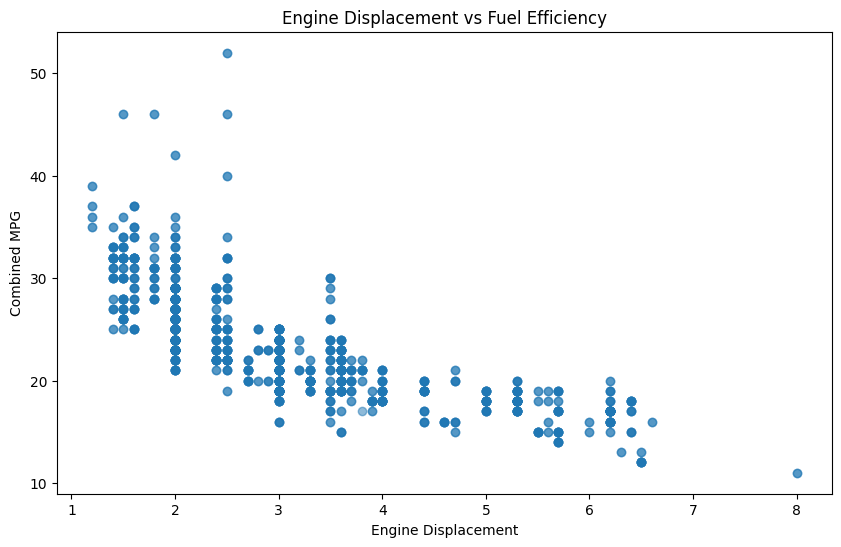

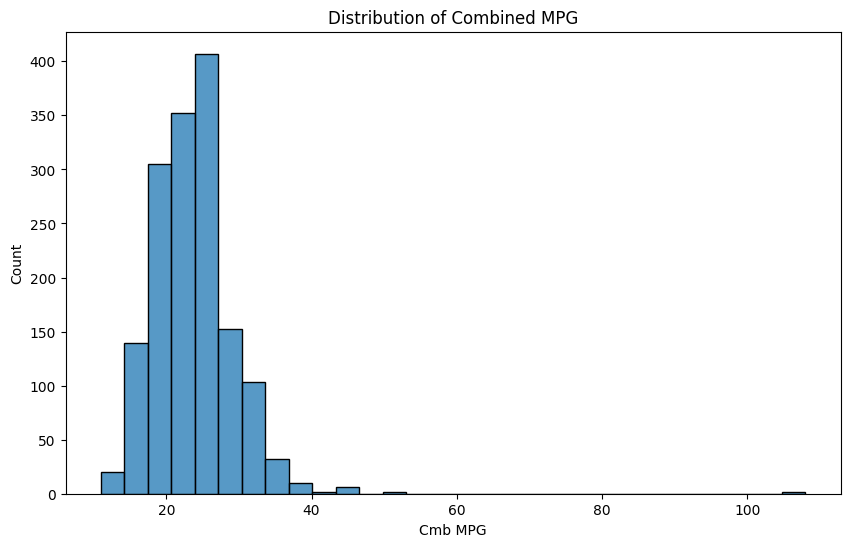

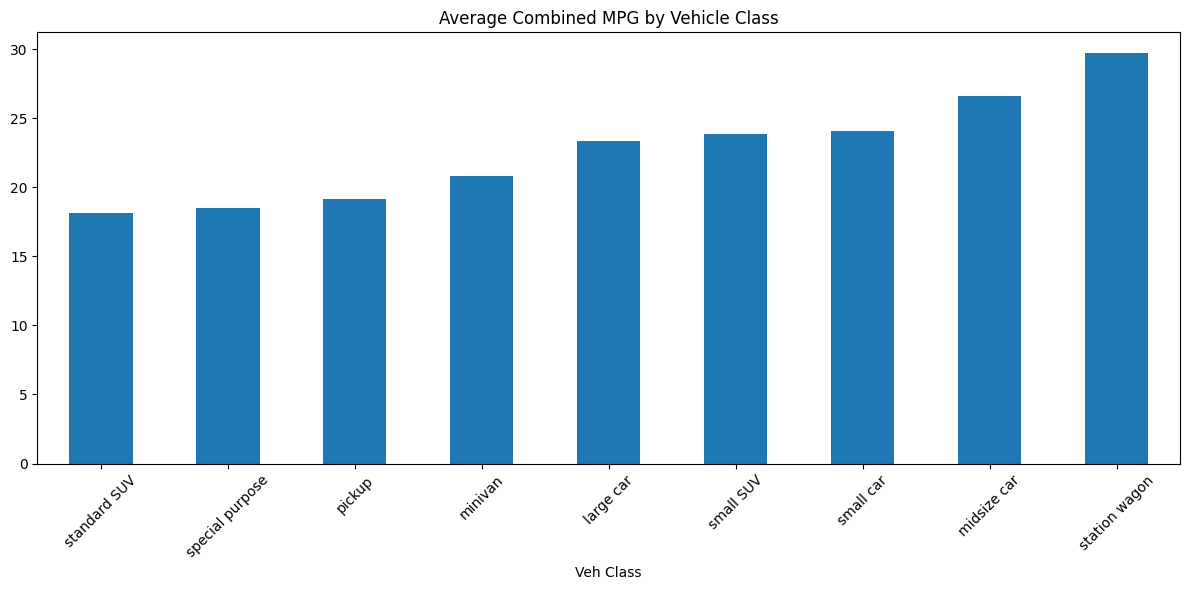

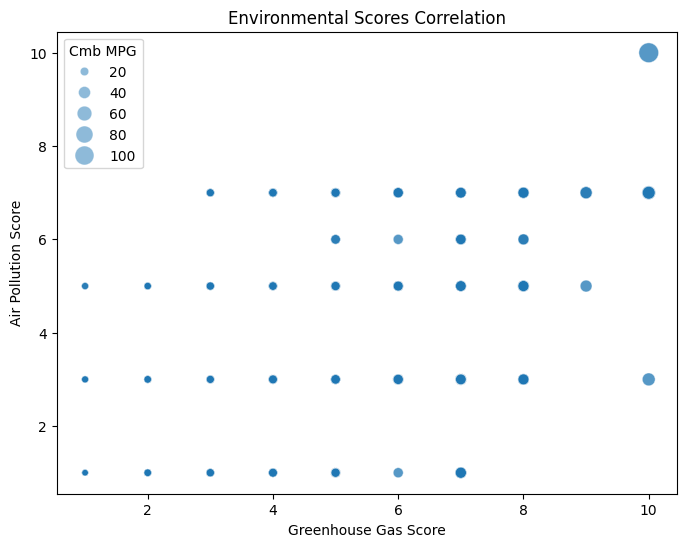


Key Findings:

Total Vehicles:
1611

Average MPG:
23.66383812010444

Most Common Vehicle Class:
small car

Average Greenhouse Gas Score:
4.711359404096834

Average Air Pollution Score:
3.9584109248913717

Fuel Types:
['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas', 'Electricity']

MPG by Efficiency Category:
                     count       mean
Efficiency_Category                  
Very Poor               52  14.115385
Poor                   412  18.405340
Moderate               587  23.066440
Good                   324  27.601852
Excellent              157  34.732484


<ipython-input-131-c77fbf539d68>:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'MPG by Efficiency Category': clean_df.groupby('Efficiency_Category')['Cmb MPG'].agg(['count', 'mean'])


In [ ]:
# Execute the analysis
cleaned_data_18, summary_18 = clean_and_analyze_vehicle_data(all_alpha_18)

# Print summary findings
print("\nKey Findings:")
for key, value in summary_18.items():
    print(f"\n{key}:")
    print(value)

**Questions:** (clean_alpha_xx)

Q1: Find out the alternative sources of fuel available in 2008 & 2018 respectively and by how much?  
Q2: Is there any improvement in 'fuel economy' with respect to vehicle class from 2008 to 2018? Perform the necessary steps to examine.  
Q3: Is there any change in characteristics of SmartWay Vehicles?  
Q4: Which features are associated with better fuel economy?  
Q5: How much improvement is there in miles/gallon or mpg? Also, which vehicle has improved the most?  

In [ ]:
# prompt: #1: Alternative sources of fuel available in 2008 & 2018 respectively and by how much?

fuel_08 = cleaned_data_08['Fuel'].value_counts()
fuel_18 = cleaned_data_18['Fuel'].value_counts()

print("Alternative Fuel Sources in 2008:")
print(fuel_08)
print("\nAlternative Fuel Sources in 2018:")
print(fuel_18)

print()
# Convert fuel_08, fuel_18 index to lower case using str.lower
fuel_08.index = fuel_08.index.map(str.lower)
fuel_18.index = fuel_18.index.map(str.lower)


# Calculate the difference in fuel types between 2008 and 2018
fuel_diff = fuel_18 - fuel_08
print("\nDifference in Fuel Types (2018 - 2008):")
print(fuel_diff.fillna(0))

Alternative Fuel Sources in 2008:
Fuel
Gasoline       2318
ethanol/gas      72
diesel           11
CNG               2
ethanol           1
Name: count, dtype: int64

Alternative Fuel Sources in 2018:
Fuel
Gasoline                1492
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Electricity                2
Name: count, dtype: int64


Difference in Fuel Types (2018 - 2008):
Fuel
cng                       0.0
diesel                   27.0
electricity               0.0
ethanol                   0.0
ethanol/gas             -17.0
gasoline               -826.0
gasoline/electricity      0.0
Name: count, dtype: float64


Common classes :  pickup, large car, minivan, small car, midsize car, station wagon, special purpose


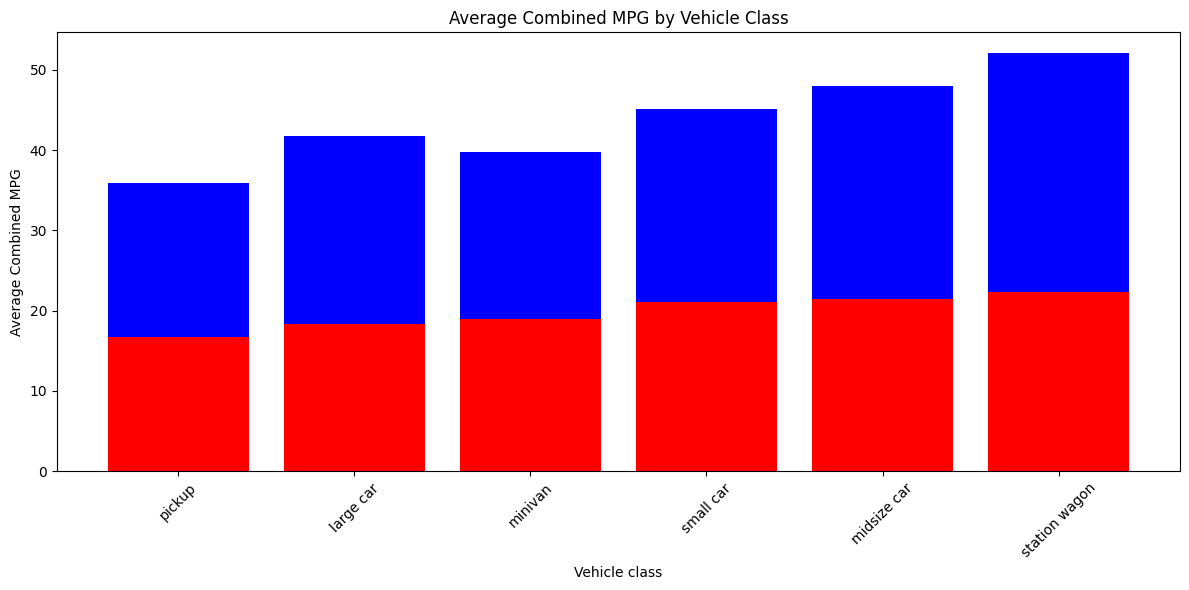

Improvement in Fuel Economy (2018 - 2008):
Veh Class
station wagon      7.372629
midsize car        5.191905
large car          4.939869
small car          2.985825
pickup             2.478929
minivan            1.857143
SUV                     NaN
small SUV               NaN
special purpose         NaN
standard SUV            NaN
van                     NaN
Name: Cmb MPG, dtype: float64


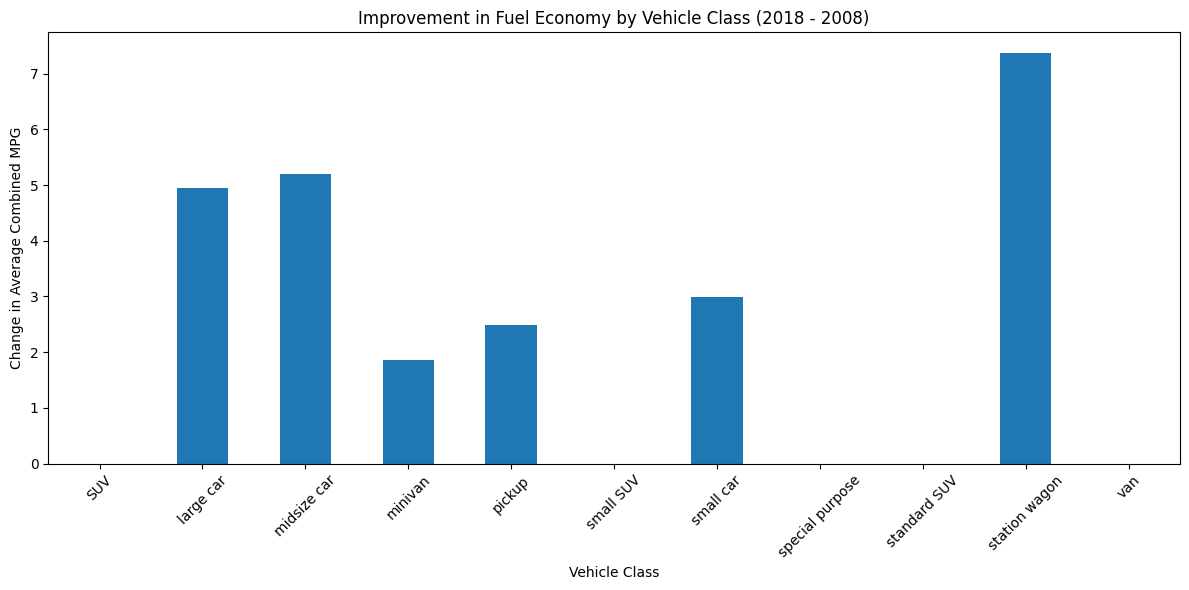

In [ ]:
#2: Improvement in 'fuel economy' with respect to vehicle class from 2008 to 2018? Perform the necessary steps to examine.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
avg_mpg_by_class = cleaned_data_08.groupby('Veh Class')['Cmb MPG'].mean().sort_values()
avg_mpg_by_class_18 = cleaned_data_18.groupby('Veh Class')['Cmb MPG'].mean().sort_values()

mpg_improvement = avg_mpg_by_class_18 - avg_mpg_by_class

# Find common vehicle classes in both datasets
common_classes = avg_mpg_by_class.index.intersection(avg_mpg_by_class_18.index)
print("Common classes : ",", ".join(list(common_classes)))

# Filter the Series to include only common classes
avg_mpg_by_class = avg_mpg_by_class[common_classes]
avg_mpg_by_class_18 = avg_mpg_by_class_18[common_classes]


# Visualize the each data
plt.bar(avg_mpg_by_class_18.index,  avg_mpg_by_class, color='red')
plt.bar(avg_mpg_by_class.index, avg_mpg_by_class_18,bottom=avg_mpg_by_class, color='blue')
plt.title('Average Combined MPG by Vehicle Class')
plt.xlabel('Vehicle class')
plt.ylabel('Average Combined MPG')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imporvement in fuel
print("Improvement in Fuel Economy (2018 - 2008):")
print(mpg_improvement.sort_values(ascending=False))


# Visualize the improvement
plt.figure(figsize=(12, 6))
mpg_improvement.plot(kind='bar')
plt.title('Improvement in Fuel Economy by Vehicle Class (2018 - 2008)')
plt.xlabel('Vehicle Class')
plt.ylabel('Change in Average Combined MPG')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SmartWay Vehicles in 2008:
SmartWay
elite       0
no       1766
yes       638
Name: count, dtype: int64

SmartWay Vehicles in 2018:
SmartWay
elite      22
no       1414
yes       175
Name: count, dtype: int64

Change in SmartWay Vehicles:
SmartWay
elite     22
no      -352
yes     -463
Name: count, dtype: int64


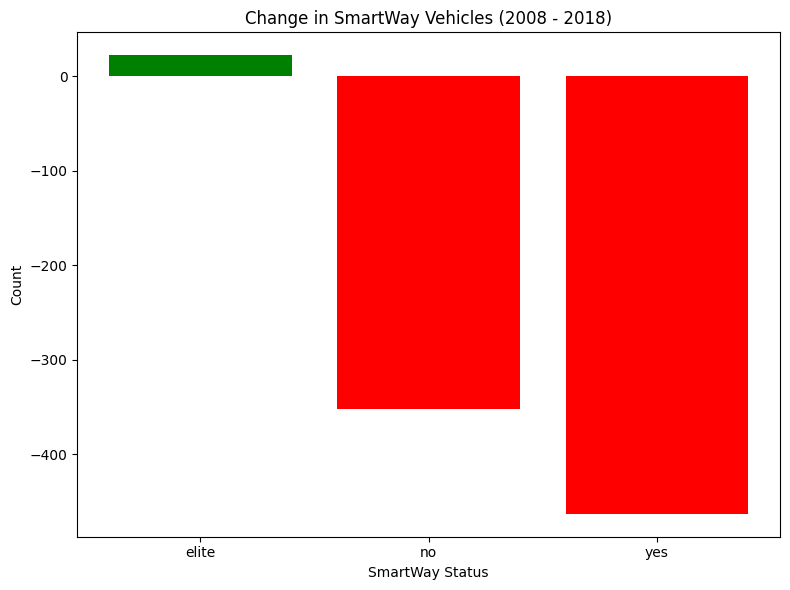

In [ ]:
#3: change in characteristics of SmartWay Vehicles?

smart_way_08 = cleaned_data_08['SmartWay'].value_counts()
smart_way_08.index = smart_way_08.index.map(str.lower)
smart_way_18 = cleaned_data_18['SmartWay'].value_counts()
smart_way_18.index = smart_way_18.index.map(str.lower)

union_index = smart_way_08.index.union(smart_way_18.index)
smart_way_08 = smart_way_08.reindex(union_index, fill_value=0)
smart_way_18 = smart_way_18.reindex(union_index, fill_value=0)

print("SmartWay Vehicles in 2008:")
print(smart_way_08)
print("\nSmartWay Vehicles in 2018:")
print(smart_way_18)

change_in_smart_way = smart_way_18-smart_way_08
print("\nChange in SmartWay Vehicles:")
print(change_in_smart_way)

# Visualize
plt.figure(figsize=(8, 6))
colors = ['r' if m <= 0 else 'g' for m in change_in_smart_way]
plt.bar(change_in_smart_way.index, change_in_smart_way, color=colors)
plt.title('Change in SmartWay Vehicles (2008 - 2018)')
plt.xlabel('SmartWay Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

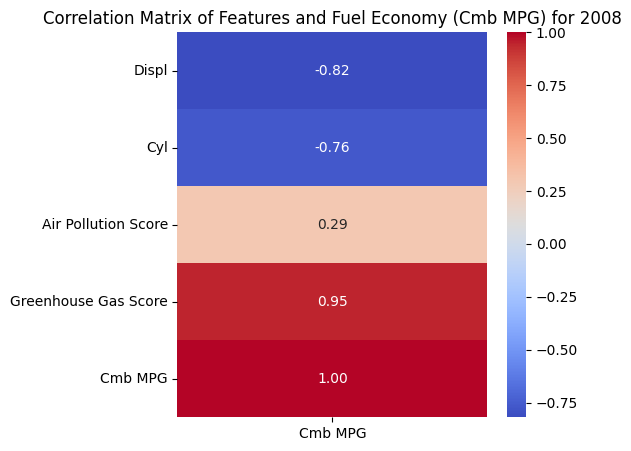

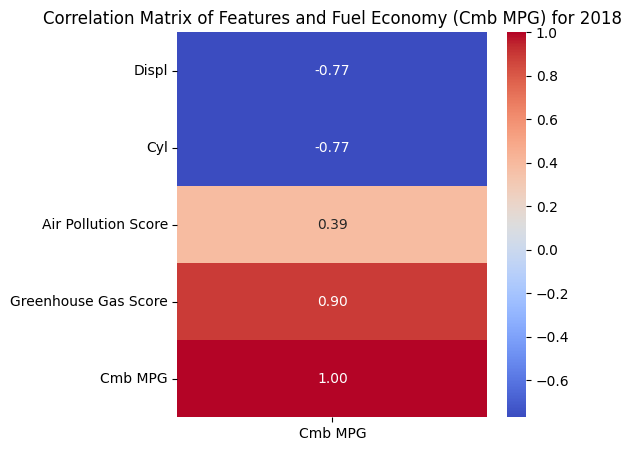

In [ ]:
#4: Which features are associated with better fuel economy?

# Analyze correlations between features and combined MPG for 2018
correlation_matrix_18 = cleaned_data_18[['Displ', 'Cyl', 'Air Pollution Score', 'Greenhouse Gas Score', 'Cmb MPG']].corr()
correlation_matrix_08 = cleaned_data_08[['Displ', 'Cyl', 'Air Pollution Score', 'Greenhouse Gas Score', 'Cmb MPG']].corr()


# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_08['Cmb MPG'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Fuel Economy (Cmb MPG) for 2008')
plt.show()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_18['Cmb MPG'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Fuel Economy (Cmb MPG) for 2018')
plt.show()



Average improvement in miles per gallon (MPG): 3.537777777777778

Vehicle with the most improvement:
Model              CHEVROLET Malibu
MPG_Improvement                26.0
Name: 812, dtype: object


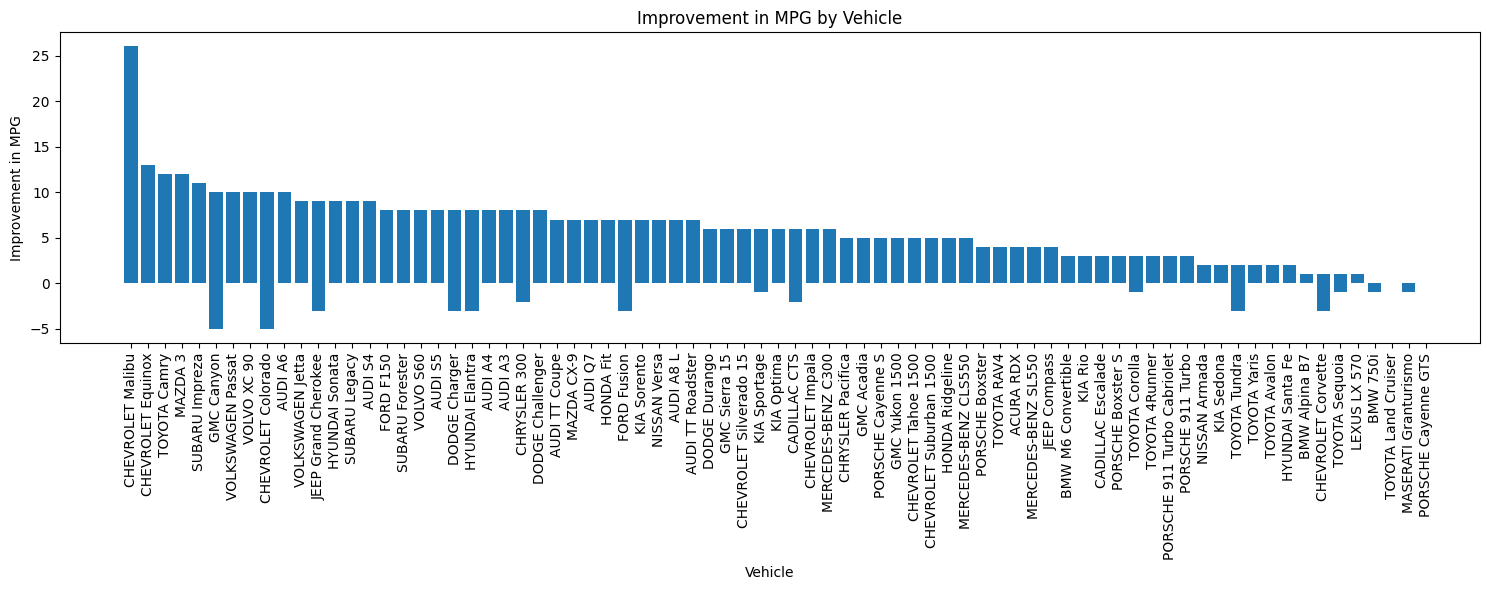

In [ ]:
#5: Improvement is there in miles/gallon or mpg? Also, which vehicle has improved the most?

# Calculate the difference in combined MPG for each vehicle between 2008 and 2018
merged_data = pd.merge(cleaned_data_08, cleaned_data_18, on='Model', how='inner', suffixes=('_08', '_18'))
merged_data['MPG_Improvement'] = merged_data['Cmb MPG_18'] - merged_data['Cmb MPG_08']


# Find the vehicle with the most significant improvement
vehicle_with_most_improvement = merged_data.loc[merged_data['MPG_Improvement'].idxmax()]

# Calculate the average improvement in MPG
average_mpg_improvement = merged_data['MPG_Improvement'].mean()

print("\nAverage improvement in miles per gallon (MPG):", average_mpg_improvement)

print("\nVehicle with the most improvement:")
print(vehicle_with_most_improvement[['Model', 'MPG_Improvement']])

# Visualize
improve_ment_by_vehicle = merged_data.sort_values(by='MPG_Improvement', ascending=False)
plt.figure(figsize=(15, 6))
plt.bar(improve_ment_by_vehicle['Model'], improve_ment_by_vehicle['MPG_Improvement'])
plt.title('Improvement in MPG by Vehicle')
plt.xlabel('Vehicle')
plt.ylabel('Improvement in MPG')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Question 4

### Election Analysis:  
Indians and elections happen almost every month and every year. Loksabha elections, however, take place every 5 years. We have data on candidates and electors from 2009 and 2014. Compare the datasets and compute the results visually:  



In [66]:
ls_2009_candidate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/LS2009Candidate.csv')
ls_2009_electors = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/LS2009Electors.csv')
ls_2014_candidate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/LS2014Candidate.csv')
ls_2014_electors = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/LS2014Electors.csv')

In [67]:
ls_2009_candidate.head()

ST_CODE      State name  Month  Year  PC Number   PC name PC Type  \
0     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
1     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
2     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
3     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
4     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   

         Candidate Name Candidate Sex Candidate Category  Candidate Age  \
0         RATHOD RAMESH             M                 ST           43.0   
1         KOTNAK RAMESH             M                 ST           39.0   
2       MESRAM NAGO RAO             M                 ST           59.0   
3           ADE TUKARAM             M                 ST           55.0   
4  RATHOD SADASHIV NAIK             M                 ST           50.0   

  Party Abbreviation  Total Votes Polled  Position  
0                TDP            372268.0       1.0  
1                INC            257181.0       2.0  
2               PRAP            112930.0       3.0  
3                BJP             57931.0       4.0  
4                BSP             16471.0       5.0

In [68]:
ls_2014_candidate.head()

ST_CODE      State name  Month  Year  PC Number    PC name PC Type  \
0     S01  Andhra Pradesh      5  2014          1  Adilabad       ST   
1     S01  Andhra Pradesh      5  2014          1  Adilabad       ST   
2     S01  Andhra Pradesh      5  2014          1  Adilabad       ST   
3     S01  Andhra Pradesh      5  2014          1  Adilabad       ST   
4     S01  Andhra Pradesh      5  2014          1  Adilabad       ST   

     Candidate Name Candidate Sex Candidate Category  Candidate Age  \
0      GODAM NAGESH             M                 ST           49.0   
1            NARESH             M                 ST           37.0   
2     RAMESH RATHOD             M                 ST           48.0   
3   RATHOD SADASHIV             M                 ST           55.0   
4  NETHAWATH RAMDAS             M                 ST           44.0   

  Party Abbreviation  Total Votes Polled  Position  
0                TRS              430847         1  
1                INC              259557         2  
2                TDP              184198         3  
3                BSP               94420         4  
4                IND               41032         5

In [69]:
ls_2009_electors.head()

STATE CODE           STATE  PC NO PARLIAMENTARY CONSTITUENCY  Total voters  \
0        S01  Andhra Pradesh      1                   Adilabad        864165   
1        S01  Andhra Pradesh      2                 Peddapalle        905332   
2        S01  Andhra Pradesh      3                 Karimnagar        990646   
3        S01  Andhra Pradesh      4                  Nizamabad        891508   
4        S01  Andhra Pradesh      5                  Zahirabad       1017372   

   Total_Electors  TOT_CONTESTANT  POLL PERCENTAGE  
0         1131211               9            76.39  
1         1315642              15            68.81  
2         1496211              15            66.21  
3         1333271              12            66.87  
4         1359566              10            74.83

In [70]:
ls_2014_electors.head()

STATE CODE           STATE  PC NO PARLIAMENTARY CONSTITUENCY  Total voters  \
0        S01  Andhra Pradesh      1                  Adilabad        1055593   
1        S01  Andhra Pradesh      2                Peddapalle        1025194   
2        S01  Andhra Pradesh      3                Karimnagar        1127225   
3        S01  Andhra Pradesh      4                  Nizamabad       1034032   
4        S01  Andhra Pradesh      5                  Zahirabad       1099784   

   Total_Electors  POLL PERCENTAGE  
0         1386282            76.15  
1         1425355            71.93  
2         1550810            72.69  
3         1496193            69.11  
4         1445354            76.09

In [71]:
print(ls_2009_candidate.info())
print(ls_2014_candidate.info())
print(ls_2009_electors.info())
print(ls_2014_electors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8070 entries, 0 to 8069
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ST_CODE             8070 non-null   object 
 1   State name          8070 non-null   object 
 2   Month               8070 non-null   int64  
 3   Year                8070 non-null   int64  
 4   PC Number           8070 non-null   int64  
 5   PC name             8070 non-null   object 
 6   PC Type             8070 non-null   object 
 7   Candidate Name      8070 non-null   object 
 8   Candidate Sex       8027 non-null   object 
 9   Candidate Category  8027 non-null   object 
 10  Candidate Age       8027 non-null   float64
 11  Party Abbreviation  8027 non-null   object 
 12  Total Votes Polled  8027 non-null   float64
 13  Position            8027 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 882.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

In [72]:
print('ls_2009_candidate:',ls_2009_candidate.shape)
print('ls_2014_candidate:',ls_2014_candidate.shape)
print('ls_2009_electors:',ls_2009_electors.shape)
print('ls_2014_electors:',ls_2014_electors.shape)

ls_2009_candidate: (8070, 14)
ls_2014_candidate: (8794, 14)
ls_2009_electors: (543, 8)
ls_2014_electors: (543, 7)


1. **Create grand alliances**  
   - UPA: 'INC', 'NCP', 'RJD', 'DMK', 'IUML', 'JMM', 'JD(s)', 'KC(M)', 'RLD', 'RSP', 'CMP(J)', 'KC(J)', 'PPI', 'MD'  
   - NDA: 'BJP', 'SS', 'LJP', 'SAD', 'RLSP', 'AD', 'PMK', 'NPP', 'AINRC', 'NPF', 'RPI(A)', 'BPF', 'JD(U)', 'SDF', 'NDPP', 'MNF', 'RIDALOS', 'KMDK', 'IJK', 'PNK', 'JSP', 'GJM', 'MGP', 'GFP', 'GVP', 'AJSU', 'IPFT', 'MPP', 'KPP', 'JKPC', 'KC(T)', 'BDJS', 'AGP', 'JSS', 'PPA', 'UDP', 'HSPDP', 'PSP', 'JRS', 'KVC', 'PNP', 'SBSP', 'KC(N)', 'PDF', 'MDPF'  
   - Others: 'YSRCP', 'AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI', 'AIMIM', 'KEC(M)', 'SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL', 'JVM', 'MDMK'  



In [73]:
groups = {
    'UPA': ['INC', 'NCP', 'RJD', 'DMK', 'IUML', 'JMM', 'JD(s)', 'KC(M)', 'RLD', 'RSP', 'CMP(J)', 'KC(J)', 'PPI', 'MD'],
    'NDA': ['BJP', 'SS', 'LJP', 'SAD', 'RLSP', 'AD', 'PMK', 'NPP', 'AINRC', 'NPF', 'RPI(A)', 'BPF', 'JD(U)', 'SDF', 'NDPP', 'MNF', 'RIDALOS', 'KMDK', 'IJK', 'PNK', 'JSP', 'GJM', 'MGP', 'GFP', 'GVP', 'AJSU', 'IPFT', 'MPP', 'KPP', 'JKPC', 'KC(T)', 'BDJS', 'AGP', 'JSS', 'PPA', 'UDP', 'HSPDP', 'PSP', 'JRS', 'KVC', 'PNP', 'SBSP', 'KC(N)', 'PDF', 'MDPF'],
    'Others': ['YSRCP', 'AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI', 'AIMIM', 'KEC(M)', 'SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL', 'JVM', 'MDMK']
}

def categorize_party(party):
    for group, parties in groups.items():
        if party in parties:
            return group
    return 'Others'


ls_2009_candidate['Allicance'] = ls_2009_candidate['Party Abbreviation'].apply(categorize_party)
ls_2014_candidate['Allicance'] = ls_2014_candidate['Party Abbreviation'].apply(categorize_party)

2. **Create winning seats distribution** by Major Political Parties & Alliances for 2009 & 2014  



In [74]:
major_party_2009 = ls_2009_candidate.groupby('Allicance').size()
major_party_2014 = ls_2014_candidate.groupby('Allicance').size()

print("Major Political Parties in 2009:")
print(major_party_2009)
print("\nMajor Political Parties in 2014:")
print(major_party_2014)

# if first is others select send else first
winning_party_2009 = major_party_2009.index[0] if major_party_2009.index[0] != 'Others' else major_party_2009.index[1]
winning_party_2014 = major_party_2014.index[0] if major_party_2014.index[0] != 'Others' else major_party_2014.index[1]

print("\nWinning Party in 2009:", winning_party_2009)
print("Winning Party in 2014:", winning_party_2014)

# Position == 1 of winning party
winning_seats_2009 = ls_2009_candidate[ls_2009_candidate['Position'] == 1]
winning_seats_2014 = ls_2014_candidate[ls_2014_candidate['Position'] == 1]


Major Political Parties in 2009:
Allicance
NDA        744
Others    6676
UPA        650
dtype: int64

Major Political Parties in 2014:
Allicance
NDA        634
Others    7530
UPA        630
dtype: int64

Winning Party in 2009: NDA
Winning Party in 2014: NDA



Winning Seats Distribution in 2009:
Allicance
NDA       143
Others    153
UPA       245
dtype: int64

Winning Seats Distribution in 2014:
Allicance
NDA       143
Others    153
UPA       245
dtype: int64


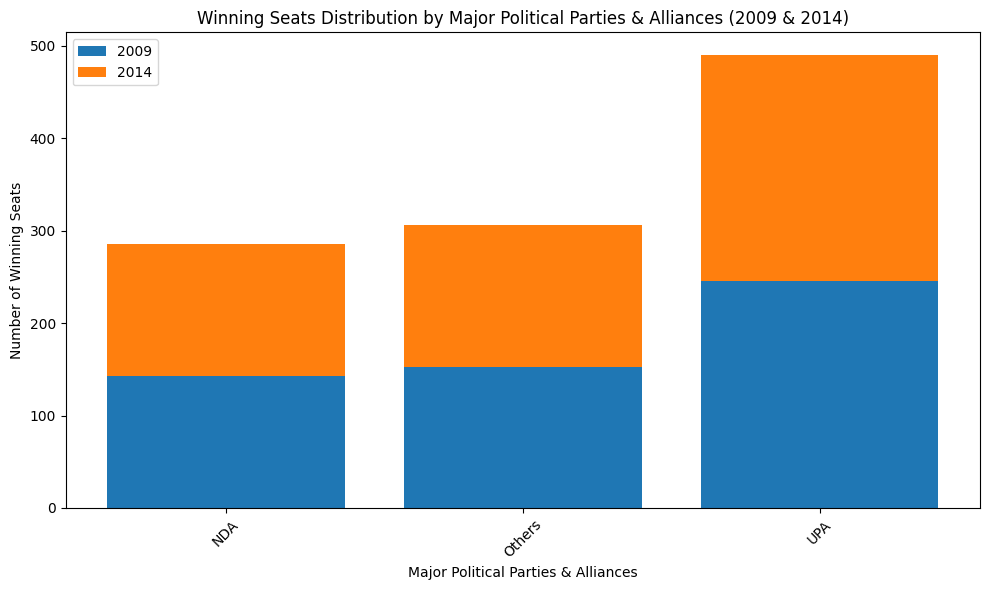

In [75]:

winning_seats_distribution_2009 = winning_seats_2009[winning_seats_2009['Position']==1].groupby('Allicance').size()
winning_seats_distribution_2014 = winning_seats_2009[winning_seats_2009['Position']==1].groupby('Allicance').size()

print("\nWinning Seats Distribution in 2009:")
print(winning_seats_distribution_2009)
print("\nWinning Seats Distribution in 2014:")
print(winning_seats_distribution_2014)

# Visualize the winning seats distribution for both years using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(winning_seats_distribution_2009.index, winning_seats_distribution_2009.values, label='2009')
plt.bar(winning_seats_distribution_2014.index, winning_seats_distribution_2014.values, bottom=winning_seats_distribution_2009.values, label='2014')
plt.xlabel("Major Political Parties & Alliances")
plt.ylabel("Number of Winning Seats")
plt.title("Winning Seats Distribution by Major Political Parties & Alliances (2009 & 2014)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. **How many seats were won** by Alliances and Major Political Parties?  




Seats Won by Alliances and Major Political Parties in 2009:
Allicance
NDA       143
Others    153
UPA       245
Name: Position, dtype: int64

Seats Won by Alliances and Major Political Parties in 2014:
Allicance
NDA       300
Others    184
UPA        59
Name: Position, dtype: int64


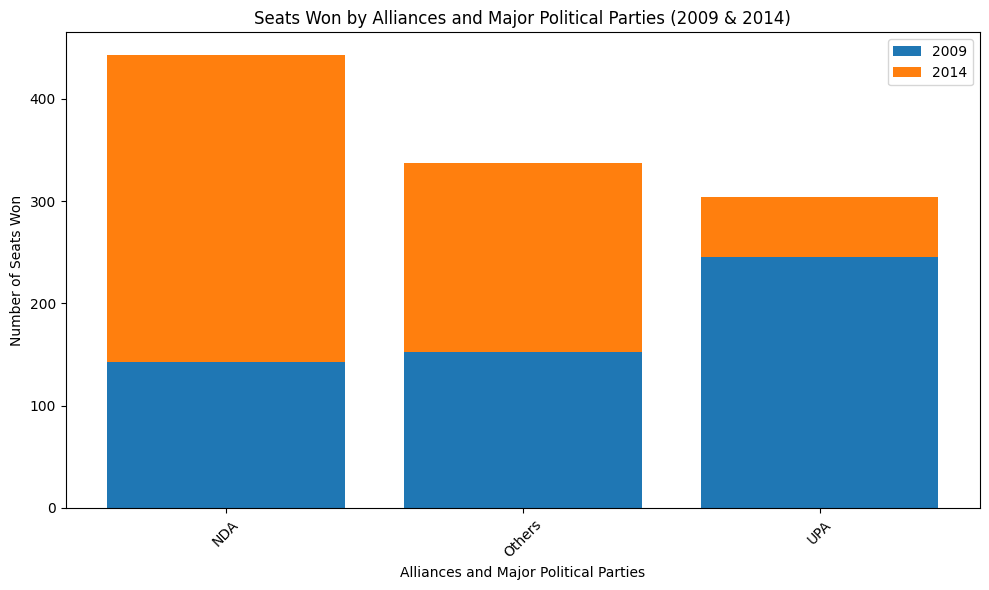

In [76]:
# Group by 'Allicance' and count the number of winning seats (where Position == 1)
seats_won_2009 = winning_seats_2009.groupby('Allicance')['Position'].count()
seats_won_2014 = winning_seats_2014.groupby('Allicance')['Position'].count()


print("\nSeats Won by Alliances and Major Political Parties in 2009:")
print(seats_won_2009)
print("\nSeats Won by Alliances and Major Political Parties in 2014:")
print(seats_won_2014)


# Create a bar chart to visualize the number of seats won by each alliance/party
plt.figure(figsize=(10, 6))

plt.bar(seats_won_2009.index, seats_won_2009.values, label='2009')
plt.bar(seats_won_2014.index, seats_won_2014.values,bottom=seats_won_2009.values, label='2014')


plt.xlabel('Alliances and Major Political Parties')
plt.ylabel('Number of Seats Won')
plt.title('Seats Won by Alliances and Major Political Parties (2009 & 2014)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. **Plot comparatively seats won** based on candidate category as General, ST, and SC for 2009 & 2014  


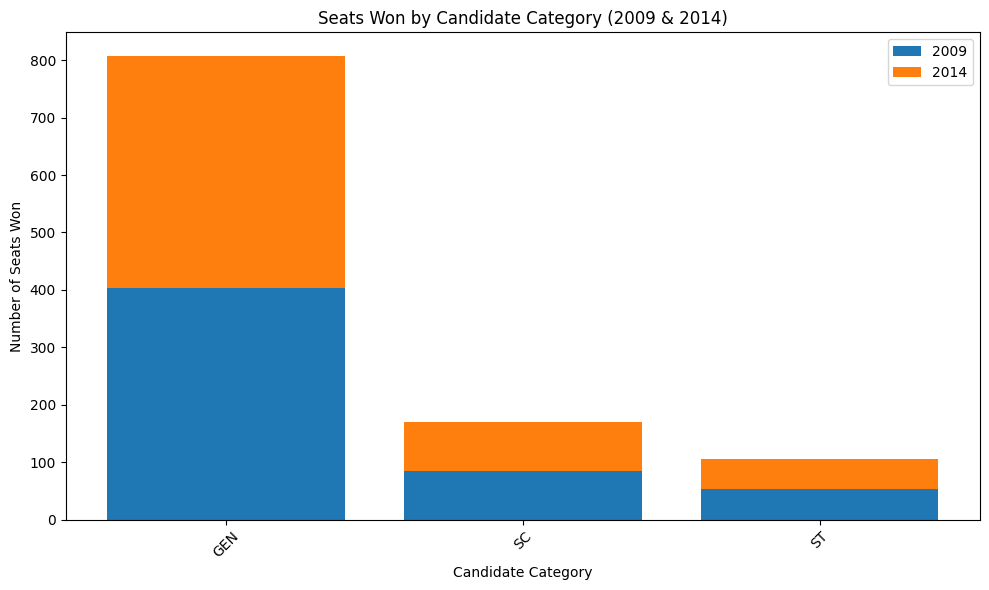

In [77]:
won_2009 = ls_2009_candidate[ls_2009_candidate['Position']==1].groupby('Candidate Category').size()
won_2014 = ls_2014_candidate[ls_2014_candidate['Position']==1].groupby('Candidate Category').size()


plt.figure(figsize=(10, 6))
plt.bar(won_2009.index, won_2009.values, label='2009')
plt.bar(won_2014.index, won_2014.values, bottom=won_2009.values, label='2014')
plt.xlabel('Candidate Category')
plt.ylabel('Number of Seats Won')
plt.title('Seats Won by Candidate Category (2009 & 2014)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5. **Plot the age distribution** of winners for both 2014 and 2009 elections  


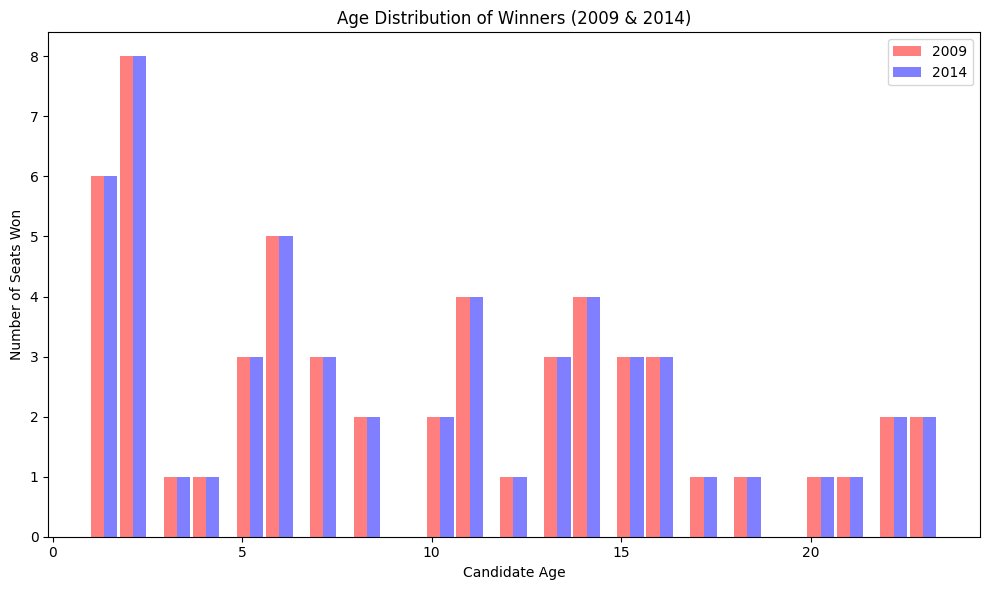

In [78]:
winning_seats_distribution_by_age_2009 = winning_seats_2009[winning_seats_2009['Position']==1].groupby('Candidate Age').size()
winning_seats_distribution_by_age_2014 = winning_seats_2009[winning_seats_2009['Position']==1].groupby('Candidate Age').size()

width = 0.35
# Create a bar chart to visualize the age distribution of winners
plt.figure(figsize=(10, 6))
plt.hist(winning_seats_distribution_by_age_2009, color='r',bins=len(winning_seats_distribution_by_age_2009), alpha=0.5, label='2009', width=width)
plt.hist(width+winning_seats_distribution_by_age_2014, color='b',bins=len(winning_seats_distribution_by_age_2014), alpha=0.5, label='2014', width=width)
plt.xlabel('Candidate Age')
plt.ylabel('Number of Seats Won')
plt.title('Age Distribution of Winners (2009 & 2014)')
plt.legend()
plt.tight_layout()
plt.show()





6. **Separately plot age distribution** of NDA & UPA candidates  


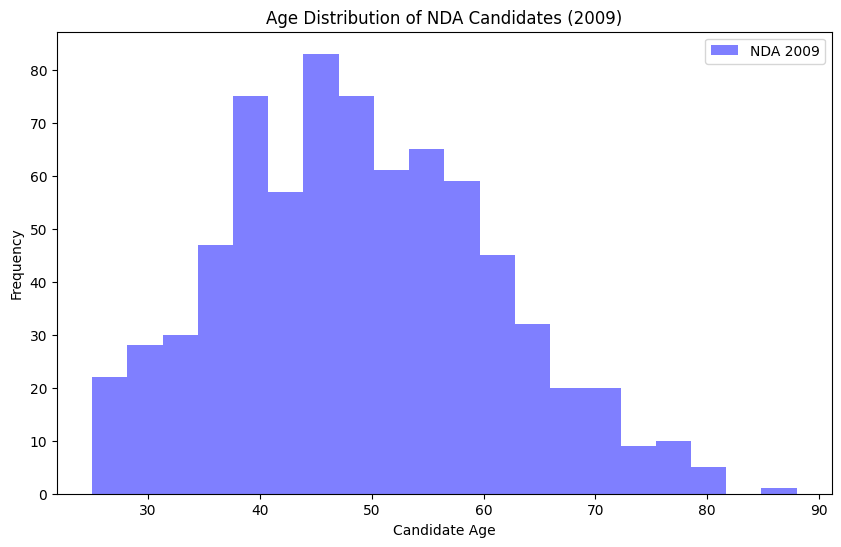

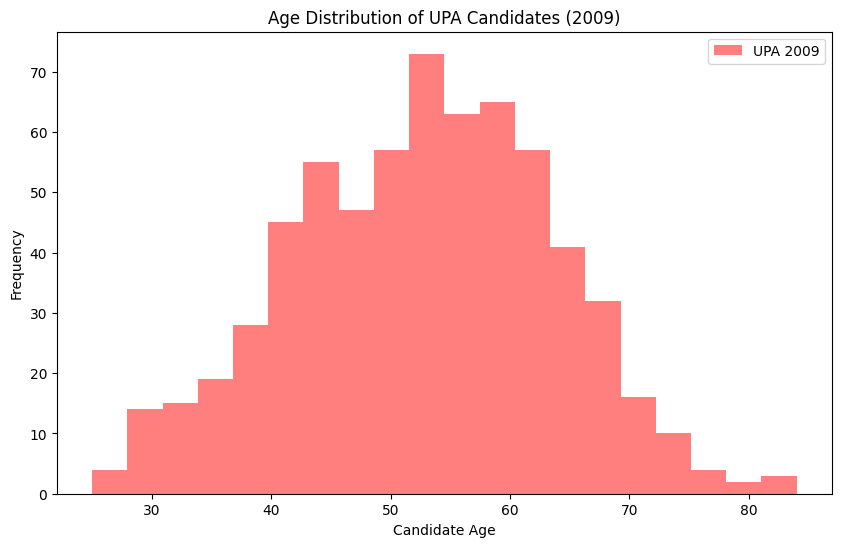

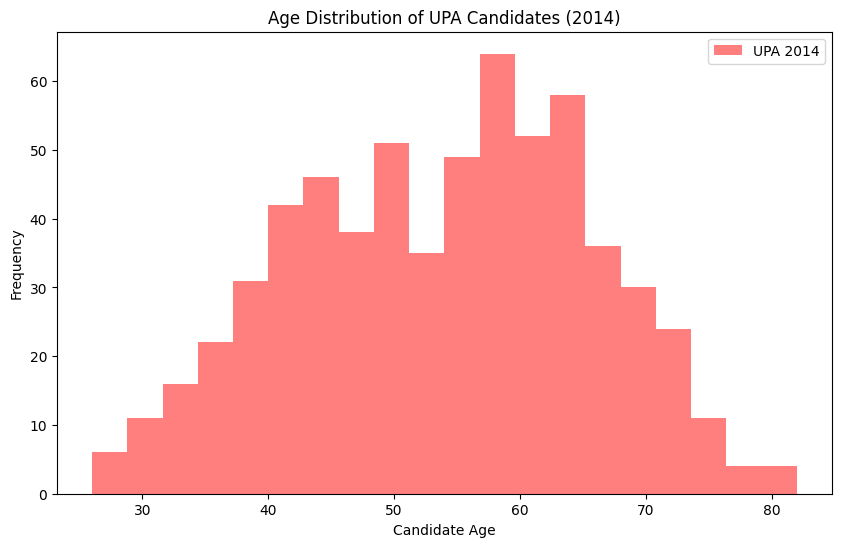

In [79]:
# Filter data for NDA and UPA candidates in 2009
nda_candidates_2009 = ls_2009_candidate[ls_2009_candidate['Allicance'] == 'NDA']
upa_candidates_2009 = ls_2009_candidate[ls_2009_candidate['Allicance'] == 'UPA']

# Filter data for NDA and UPA candidates in 2014
nda_candidates_2014 = ls_2014_candidate[ls_2014_candidate['Allicance'] == 'NDA']
upa_candidates_2014 = ls_2014_candidate[ls_2014_candidate['Allicance'] == 'UPA']

# Plot age distribution for NDA candidates in 2009
plt.figure(figsize=(10, 6))
plt.hist(nda_candidates_2009['Candidate Age'], bins=20, color='blue', alpha=0.5, label='NDA 2009')
plt.xlabel('Candidate Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of NDA Candidates (2009)')
plt.legend()
plt.show()

# Plot age distribution for UPA candidates in 2009
plt.figure(figsize=(10, 6))
plt.hist(upa_candidates_2009['Candidate Age'], bins=20, color='red', alpha=0.5, label='UPA 2009')
plt.xlabel('Candidate Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of UPA Candidates (2009)')
plt.legend()
plt.show()

# Plot age distribution for NDA candidates in 2014
plt.figure(figsize=(10, 6))
plt.hist(nda_candidates_2014['Candidate Age'], bins=20, color='blue', alpha=0.5, label='NDA 2014')
plt.xlabel('Candidate Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of NDA Candidates (2014)')
plt.legend()
plt.show()

# Plot age distribution for UPA candidates in 2014
plt.figure(figsize=(10, 6))
plt.hist(upa_candidates_2014['Candidate Age'], bins=20, color='red', alpha=0.5, label='UPA 2014')
plt.xlabel('Candidate Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of UPA Candidates (2014)')
plt.legend()
plt.show()


7. **Plot gender distributions** of 2009 & 2014 elections  


In [80]:
ls_2009_candidate.head()

ST_CODE      State name  Month  Year  PC Number   PC name PC Type  \
0     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
1     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
2     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
3     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
4     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   

         Candidate Name Candidate Sex Candidate Category  Candidate Age  \
0         RATHOD RAMESH             M                 ST           43.0   
1         KOTNAK RAMESH             M                 ST           39.0   
2       MESRAM NAGO RAO             M                 ST           59.0   
3           ADE TUKARAM             M                 ST           55.0   
4  RATHOD SADASHIV NAIK             M                 ST           50.0   

  Party Abbreviation  Total Votes Polled  Position Allicance  
0                TDP            372268.0       1.0    Others  
1                INC            257181.0       2.0       UPA  
2               PRAP            112930.0       3.0    Others  
3                BJP             57931.0       4.0       NDA  
4                BSP             16471.0       5.0    Others

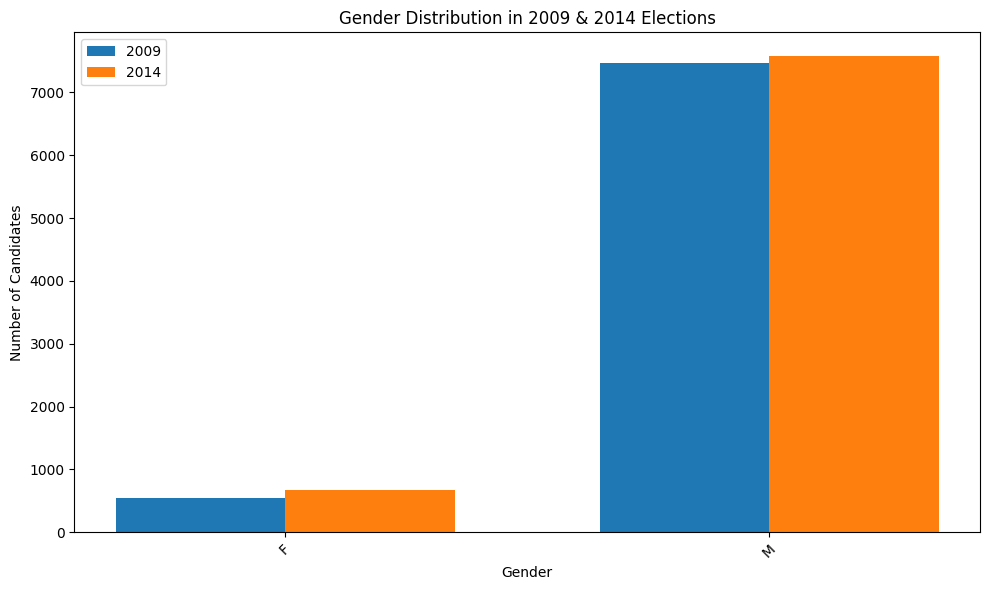

In [81]:
gender_distribution_2009 = ls_2009_candidate.groupby('Candidate Sex').size()
gender_distribution_2014 = ls_2014_candidate.groupby('Candidate Sex').size()

# Find common indices (gender categories)
common_indices = gender_distribution_2009.index.intersection(gender_distribution_2014.index)

# Reindex both series using common indices to ensure they have the same shape
gender_distribution_2009 = gender_distribution_2009.reindex(common_indices)
gender_distribution_2014 = gender_distribution_2014.reindex(common_indices)

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
x_pos_2009 = np.arange(len(common_indices))
x_pos_2014 = x_pos_2009 + bar_width  # Shift 2014 bars to the right

# Create a figure and axes
plt.figure(figsize=(10, 6))
plt.bar(x_pos_2009, gender_distribution_2009.values, width=bar_width, label='2009')
plt.bar(x_pos_2014, gender_distribution_2014.values, width=bar_width, label='2014')
plt.xticks(x_pos_2009 + bar_width / 2, common_indices, rotation=45)  # Centered labels
plt.xlabel("Gender")
plt.ylabel("Number of Candidates")
plt.title("Gender Distribution in 2009 & 2014 Elections")

plt.legend()
plt.tight_layout()
plt.show()


8. **Plot gender distribution** of NDA and UPA separately for 2009 elections  


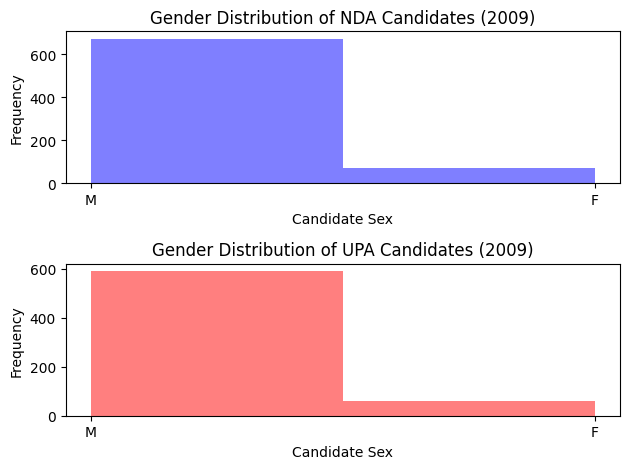

In [88]:
nda_candidates_2009 = ls_2009_candidate[ls_2009_candidate['Allicance'] == 'NDA']
upa_candidates_2009 = ls_2009_candidate[ls_2009_candidate['Allicance'] == 'UPA']

# Plot distribution
fig, ax = plt.subplots(2, 1)

plt.sca(ax[0])
plt.hist(nda_candidates_2009['Candidate Sex'], bins=2, color='blue', alpha=0.5, label='NDA 2009')
plt.title('Gender Distribution of NDA Candidates (2009)')
plt.xlabel('Candidate Sex')
plt.ylabel('Frequency')

plt.sca(ax[1])
plt.hist(upa_candidates_2009['Candidate Sex'], bins=2, color='red', alpha=0.5, label='UPA 2009')
plt.title('Gender Distribution of UPA Candidates (2009)')
plt.xlabel('Candidate Sex')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


9. **Plot gender distribution** of NDA and UPA separately for 2014 elections  


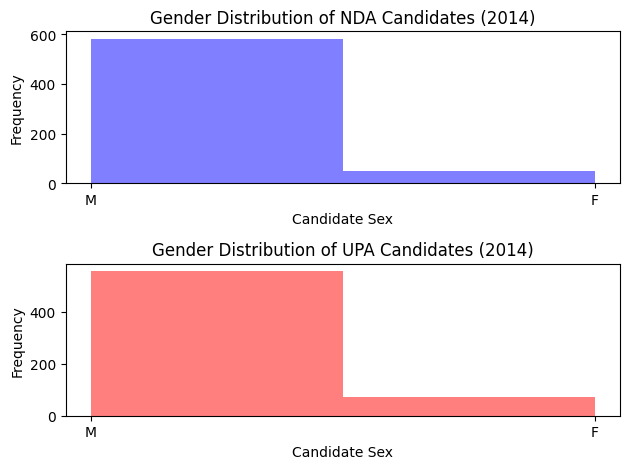

In [89]:
nda_candidates_2014 = ls_2014_candidate[ls_2014_candidate['Allicance'] == 'NDA']
upa_candidates_2014 = ls_2014_candidate[ls_2014_candidate['Allicance'] == 'UPA']

# Plot distribution
fig, ax = plt.subplots(2, 1)

plt.sca(ax[0])
plt.hist(nda_candidates_2014['Candidate Sex'], bins=2, color='blue', alpha=0.5, label='NDA 2014')
plt.title('Gender Distribution of NDA Candidates (2014)')
plt.xlabel('Candidate Sex')
plt.ylabel('Frequency')

plt.sca(ax[1])
plt.hist(upa_candidates_2014['Candidate Sex'], bins=2, color='red', alpha=0.5, label='UPA 2014')
plt.title('Gender Distribution of UPA Candidates (2014)')
plt.xlabel('Candidate Sex')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


10. **Plot the poll percentage** of states for 2009 & 2014 elections  

In [96]:
ls_2009_electors.head()

STATE CODE           STATE  PC NO PARLIAMENTARY CONSTITUENCY  Total voters  \
0        S01  Andhra Pradesh      1                   Adilabad        864165   
1        S01  Andhra Pradesh      2                 Peddapalle        905332   
2        S01  Andhra Pradesh      3                 Karimnagar        990646   
3        S01  Andhra Pradesh      4                  Nizamabad        891508   
4        S01  Andhra Pradesh      5                  Zahirabad       1017372   

   Total_Electors  TOT_CONTESTANT  POLL PERCENTAGE  
0         1131211               9            76.39  
1         1315642              15            68.81  
2         1496211              15            66.21  
3         1333271              12            66.87  
4         1359566              10            74.83

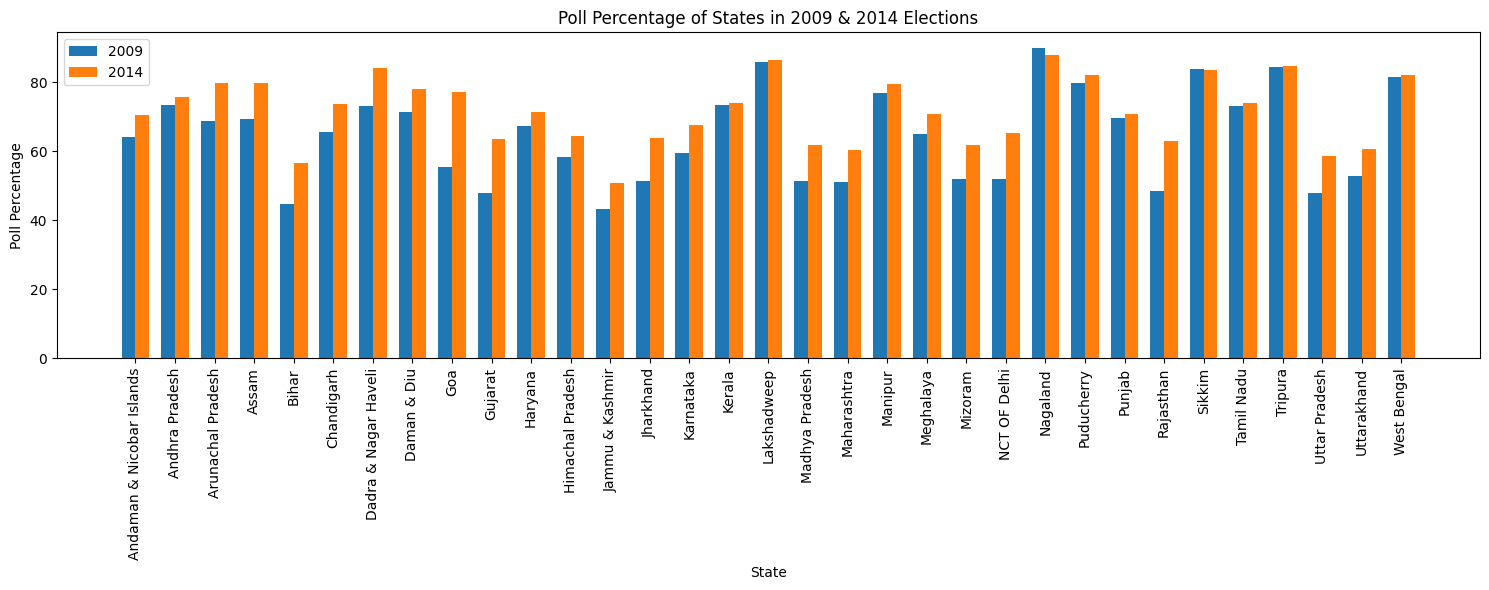

In [97]:
poll_percentage_2009 = ls_2009_electors.groupby('STATE')['POLL PERCENTAGE'].mean()
poll_percentage_2014 = ls_2014_electors.groupby('STATE')['POLL PERCENTAGE'].mean()

# Find common indices (states)
common_indices = poll_percentage_2009.index.intersection(poll_percentage_2014.index)

# Reindex both series using common indices to ensure they have the same shape
poll_percentage_2009 = poll_percentage_2009.reindex(common_indices)
poll_percentage_2014 = poll_percentage_2014.reindex(common_indices)


# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
x_pos_2009 = np.arange(len(common_indices))
x_pos_2014 = x_pos_2009 + bar_width  # Shift 2014 bars to the right

# Create a figure and axes
plt.figure(figsize=(15, 6))
plt.bar(x_pos_2009, poll_percentage_2009.values, width=bar_width, label='2009')
plt.bar(x_pos_2014, poll_percentage_2014.values, width=bar_width, label='2014')

plt.xticks(x_pos_2009 + bar_width / 2, common_indices, rotation=90)  # Centered labels
plt.xlabel("State")
plt.ylabel("Poll Percentage")
plt.title("Poll Percentage of States in 2009 & 2014 Elections")

plt.legend()
plt.tight_layout()
plt.show()